# Оглавление

1. [Изучение данных из файлов](#start)
2. [Предобработка данных](#preprocessing)
    * [Работа с дубликатами](#2.1)
    * [Работа со строковыми значениями](#2.2)
    * [Работа с пропусками](#2.3)
    * [Вывод](#2.4)
3. [Подготовка данных к анализу](#preparation)
    * [Приведение даты к удобному для работы вид](#3.1)
    * [Приводим float к int, считаем средние показатели](#3.2)
    * [Объеденим все необходимые данные в одну таблицу](#3.3)
    * [Посчитаем суммы дохода от каждого пользователя (c превышения тарифа и общий по месяцам)](#3.4)
	* [Вывод](#3.5)
4. [Aнализ данных](#analysis)
    * [Расчитываем средние показатели затраченных минут, сообщений, интернет-траффика по месяцам](#4.1)
    * [Расчитываем дисперсию и стандартное отклонение](#4.2)
    * [Обработаем выбросы](#4.3)
    * [Гистограмма продолжительности разговора](#4.4)
	* [Гистограмма интернет траффика](#4.5)
	* [Гистограмма сообщений](#4.6)
5. [Проверка гипотез](#verification)
    * [Средняя выручка пользователей тарифов «Ультра» и «Смарт»](#5.1)
    * [Средняя выручка пользователей из Москвы и других регионов](#5.2)
5. [Общий Вывод](#conclusion)

# Исследование доходов от тарифных планов

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифных планов**

<table>
    <tr><th>Услуги</th><th>Тариф "Смарт"</th><th>Тариф "Ультра"</th></tr>
    <tr><th>Ежемесячная плата, руб.</th><th>550</th><th>1950</th></tr>
    <tr><th>Включено: минуты/сообщения/интернет</th><th>500 / 50 / 15</th><th>3000 / 1000 / 30</th></tr>
    <tr><th>Стоимость услуг сверх тарифного пакета, руб.: минуты/сообщения/интернет</th><th>3 / 3 / 200</th><th>1 / 1 / 150</th></tr>
</table>

**Внимание:**
<br>«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
<br>Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Необходимо провести:**
 - предобработку данных;
 - привести все данные к виду удобному для работы;
 - провести анализ объема услуг используемых клиентами за каждый месяц;
 - расчитать прыбыль полученную с клиентов использующих разные тарифы.

**Гипотезы для проверки:**
 - различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?
 - различается ли средняя выручка пользователей из Москвы и других регионов?

**Описание данных**

Таблица users (информация о пользователях):
 - user_id — уникальный идентификатор пользователя
 - first_name — имя пользователя
 - last_name — фамилия пользователя
 - age — возраст пользователя (годы)
 - reg_date — дата подключения тарифа (день, месяц, год)
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - city — город проживания пользователя
 - tariff — название тарифного плана

Таблица calls (информация о звонках):
 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - user_id — идентификатор пользователя
 
Таблица tariffs (информация о тарифах):
 - tariff_name — название тарифа
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## <a id="start">Изучение данных из файлов</a>

In [38]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки NumPy
from scipy import stats as st # импорт метода stats библиотеки SciPy
from IPython.display import display # импортируем метод display из библиотеки IPython.display
import matplotlib.pyplot as plt

# чтение файлов с данными, сохранение в переменные df_'table name'
df_users = pd.read_csv('/datasets/users.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
    
pd.set_option('display.max_columns', None) # отображаем все колонки таблицы

# для удобства обзора объеденим файлы с данными в одну группу
df_list = [df_users, df_calls, df_internet, df_messages, df_tariffs]
for df in df_list:
    display(df.head())
    df.info()
    display(df.describe())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


### Вывод

При первом осмотре данных замечено следующее:
 - даты нужно привести к типу datetime;
 - после обработке числовых данных в соответствии с политикой оператора, необходимо привести их к типу integer;

## <a id="preprocessing">Предобработка данных</a>

In [39]:
# просто для удобства в таблице df_users столбец tariff переименуем в tariff_name
df_users = df_users.rename(columns={'tariff': 'tariff_name'})

In [40]:
del df_internet['Unnamed: 0'] # удаляем столбец дублирующий индексы
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### <a id="2.1">Работа с дубликатами</a>

In [41]:
for df in df_list:
    display(df.duplicated().sum())

0

0

0

0

0

Дубликатов нет, это удивляет, но и радует, едем дальше.

### <a id="2.2">Работа со строковыми значениями</a>

Проверим названия столбцов в таблицах, на наличие незамеченых ошибок(вроде пробелов)

In [42]:
for df in df_list:
    display(df.columns)

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Index(['id', 'message_date', 'user_id'], dtype='object')

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

проверяем уникальные значения в необходимых для исследования столбцах

In [43]:
df_users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [44]:
df_users['tariff_name'].sort_values().unique()

array(['smart', 'ultra'], dtype=object)

### <a id="2.3">Работа с пропусками</a>

In [45]:
for df in df_list:
    display(df.isna().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

id           0
call_date    0
duration     0
user_id      0
dtype: int64

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

### <a id="2.4">Вывод</a>

В процессе предобработки не было обнаружено каких-либо значимых артефактов.
<br>Единственная вещь, которую пришлось удалить, это столбец "Unnamed: 0", который дублировал индексы в таблице df_internet.
<br>Значения NaN в столбце churn_date таблицы df_users обусловлены тем, что договоры обслуживания клиентов еще действуют. 

## <a id="preparation">Подготовка данных к анализу</a>

### <a id="3.1">Приведение даты к удобному для работы виду</a>

In [46]:
# приведем дыты к соответствующему типу
for df in df_list:
    df_cols = [cols for cols in df.columns if 'date' in cols]
    for cols in df_cols:
        df[cols] = pd.to_datetime(df[cols], format="%Y-%m-%d")

In [47]:
# проверим, все ли столбцы с датами получили правильный тип данных
for df in df_list:
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

### <a id="3.2">Приводим float к int, считаем средние показатели</a>

In [48]:
# переводим Mb в Gb
df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024
df_tariffs = df_tariffs.rename(columns = {'mb_per_month_included': 'gb_per_month_included'})\
            .astype({'gb_per_month_included': np.int64})
df_tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [49]:
## узнаем время и количество звонков в месяц для каждого пользователя
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['month'] = df_calls['call_date'].dt.month
calls_filtered = df_calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id': 'count'})\
      .reset_index().rename(columns={'duration': 'month_total_duration', 'id': 'month_total_calls'})
calls_filtered.describe()

,user_id,month,month_total_duration,month_total_calls
count,3174.000000,3174.000000,3174.000000,3174.000000
mean,1251.555766,8.311594,456.931632,63.833333
std,144.470630,2.910625,238.031270,32.678036
min,1000.000000,1.000000,0.000000,1.000000
25%,1126.000000,6.000000,290.000000,41.000000
50%,1254.000000,9.000000,447.000000,63.000000
75%,1378.000000,11.000000,592.000000,83.000000
max,1499.000000,12.000000,1673.000000,244.000000


In [50]:
# узнаем количество интернет трафика в месяц для каждого пользователя
df_internet['month'] = df_internet['session_date'].dt.month
internet_filtered = df_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})\
      .reset_index().rename(columns={'mb_used': 'month_total_traffic_gb'})
internet_filtered['month_total_traffic_gb'] = np.ceil(internet_filtered['month_total_traffic_gb'] / 1024)
internet_filtered.describe()

,user_id,month,month_total_traffic_gb
count,3203.000000,3203.000000,3203.000000
mean,1251.393069,8.320949,17.358414
std,144.824407,2.903834,7.343379
min,1000.000000,1.000000,0.000000
25%,1124.000000,6.000000,13.000000
50%,1251.000000,9.000000,17.000000
75%,1379.000000,11.000000,21.000000
max,1499.000000,12.000000,49.000000


In [51]:
# узнаем количество сообщений в месяц для каждого пользователя
df_messages['month'] = df_messages['message_date'].dt.month
message_filtered = df_messages.groupby(['user_id', 'month']).agg({'id': 'count'})\
      .reset_index().rename(columns={'id': 'month_total_message'})
message_filtered.describe()

,user_id,month,month_total_message
count,2717.000000,2717.000000,2717.000000
mean,1255.635259,8.345234,45.283769
std,146.227484,2.892920,35.051363
min,1000.000000,1.000000,1.000000
25%,1126.000000,6.000000,19.000000
50%,1266.000000,9.000000,38.000000
75%,1384.000000,11.000000,63.000000
max,1499.000000,12.000000,224.000000


### <a id="3.3">Объеденим все необходимые данные в одну таблицу</a>

In [52]:
general_table = calls_filtered.merge(internet_filtered, on=['user_id', 'month'], how='outer')
general_table = general_table.merge(message_filtered, on=['user_id', 'month'], how='outer')
general_table.sample(10)

,user_id,month,month_total_duration,month_total_calls,month_total_traffic_gb,month_total_message
3025,1475,8,286.0,29.0,14.0,24.0
2558,1403,6,50.0,10.0,31.0,56.0
729,1117,12,282.0,36.0,12.0,NaN
1646,1264,8,451.0,67.0,24.0,20.0
1336,1211,9,281.0,35.0,16.0,15.0
2817,1440,12,200.0,27.0,24.0,105.0
2765,1433,4,406.0,66.0,19.0,96.0
2249,1360,8,771.0,98.0,9.0,NaN
2578,1407,8,149.0,24.0,11.0,11.0
2334,1374,9,391.0,62.0,14.0,73.0


In [54]:
general_table.isna().sum()

user_id                     0
month                       0
month_total_duration       40
month_total_calls          40
month_total_traffic_gb     11
month_total_message       497
dtype: int64

Похоже есть люди, которые не пользовались некоторыми услугами в пределах своего тарифа. 
<br>Заменим пропущенные значения на 0.

In [55]:
general_table['month_total_duration'] = general_table['month_total_duration'].fillna(0)
general_table['month_total_calls'] = general_table['month_total_calls'].fillna(0)
general_table['month_total_traffic_gb'] = general_table['month_total_traffic_gb'].fillna(0)
general_table['month_total_message'] = general_table['month_total_message'].fillna(0)
general_table.isna().sum()

user_id                   0
month                     0
month_total_duration      0
month_total_calls         0
month_total_traffic_gb    0
month_total_message       0
dtype: int64

In [56]:
general_table['user_id'].sum()

4022611

In [57]:
general_table = general_table.merge(df_users, on='user_id', how='left')
general_table.sample(10)

,user_id,month,month_total_duration,month_total_calls,month_total_traffic_gb,month_total_message,age,churn_date,city,first_name,last_name,reg_date,tariff_name
806,1127,9,272.0,34.0,16.0,73.0,26,NaN,Казань,Альберта,Ильина,2018-04-11,smart
1899,1302,10,197.0,29.0,15.0,73.0,43,NaN,Уфа,Владислав,Абаимов,2018-01-23,smart
1279,1203,4,553.0,71.0,8.0,21.0,39,NaN,Москва,Владимир,Григорьев,2018-03-13,ultra
2021,1323,9,499.0,67.0,23.0,60.0,67,NaN,Челябинск,Эсмеральда,Носкова,2018-08-02,smart
879,1143,8,615.0,76.0,12.0,0.0,64,NaN,Пермь,Арсен,Покровский,2018-04-27,ultra
2249,1360,8,771.0,98.0,9.0,0.0,46,NaN,Санкт-Петербург,Лаура,Макарова,2018-03-18,ultra
577,1093,6,59.0,9.0,1.0,6.0,73,NaN,Санкт-Петербург,Вероника,Лапина,2018-06-29,smart
98,1013,11,369.0,52.0,10.0,17.0,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra
1862,1298,7,108.0,11.0,6.0,4.0,29,NaN,Новосибирск,Надежда,Чеснокова,2018-07-26,smart
1142,1180,5,86.0,12.0,36.0,22.0,27,NaN,Москва,Лев,Мишин,2018-02-02,ultra


In [58]:
general_table['user_id'].sum()

4022611

In [59]:
general_table = general_table.merge(df_tariffs, on='tariff_name', how='left')
general_table.sample(10)

,user_id,month,month_total_duration,month_total_calls,month_total_traffic_gb,month_total_message,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2123,1339,9,417.0,66.0,20.0,0.0,52,NaN,Москва,Григорий,Вишневский,2018-08-14,smart,50,15,500,550,200,3,3
1170,1185,9,832.0,106.0,42.0,0.0,26,NaN,Санкт-Петербург,Мануэла,Родина,2018-04-13,ultra,1000,30,3000,1950,150,1,1
109,1015,5,401.0,68.0,17.0,73.0,26,NaN,Челябинск,Рузана,Алюшина,2018-04-30,smart,50,15,500,550,200,3,3
320,1051,10,123.0,16.0,10.0,0.0,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,50,15,500,550,200,3,3
91,1012,6,219.0,29.0,25.0,15.0,38,NaN,Санкт-Петербург,Варлам,Соловьев,2018-03-28,smart,50,15,500,550,200,3,3
3049,1478,9,187.0,27.0,16.0,86.0,75,NaN,Грозный,Таира,Константинова,2018-07-16,smart,50,15,500,550,200,3,3
2375,1378,7,517.0,75.0,12.0,12.0,21,NaN,Иркутск,Евгения,Бычкова,2018-01-19,smart,50,15,500,550,200,3,3
2949,1464,11,597.0,79.0,21.0,27.0,44,NaN,Саранск,Антонина,Авросинова,2018-02-17,smart,50,15,500,550,200,3,3
292,1047,10,109.0,12.0,2.0,5.0,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart,50,15,500,550,200,3,3
2819,1441,12,182.0,23.0,26.0,38.0,62,NaN,Самара,Леонтий,Белозёров,2018-11-07,smart,50,15,500,550,200,3,3


In [60]:
general_table['user_id'].sum()

4022611

In [61]:
# приведем float к int
general_table = general_table.astype({'month_total_duration': np.int64,
                'month_total_calls': np.int64,
                'month_total_traffic_gb': np.int64,
                'month_total_message': np.int64,
})
general_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 3214 non-null   int64 
 1   month                   3214 non-null   int64 
 2   month_total_duration    3214 non-null   int64 
 3   month_total_calls       3214 non-null   int64 
 4   month_total_traffic_gb  3214 non-null   int64 
 5   month_total_message     3214 non-null   int64 
 6   age                     3214 non-null   int64 
 7   churn_date              187 non-null    object
 8   city                    3214 non-null   object
 9   first_name              3214 non-null   object
 10  last_name               3214 non-null   object
 11  reg_date                3214 non-null   object
 12  tariff_name             3214 non-null   object
 13  messages_included       3214 non-null   int64 
 14  gb_per_month_included   3214 non-null   int64 
 15  minu

### <a id="3.4">Посчитаем суммы дохода от каждого пользователя (c превышения тарифа и общий по месяцам)</a>

In [62]:
def tariff_profit(row):
    mins = (row['month_total_duration'] - row['minutes_included']) * row['rub_per_minute']
    traf = (row['month_total_traffic_gb'] - row['gb_per_month_included']) * row['rub_per_gb']
    mes = (row['month_total_message'] - row['messages_included']) * row['rub_per_message']
    result = 0
    for i in [mins, traf, mes]:
        if i > 0:
            result += i
    return result

In [63]:
general_table['excess_profit'] = general_table.apply(lambda x: tariff_profit(x), axis=1)
general_table['total_month_profit'] = general_table['excess_profit'] + general_table['rub_monthly_fee']
general_table.sample(10)

,user_id,month,month_total_duration,month_total_calls,month_total_traffic_gb,month_total_message,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,excess_profit,total_month_profit
75,1010,10,245,36,15,0,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart,50,15,500,550,200,3,3,0,550
916,1148,4,329,50,21,10,23,NaN,Тольятти,Евдокия,Киреева,2018-04-17,ultra,1000,30,3000,1950,150,1,1,0,1950
381,1059,12,726,92,19,21,47,NaN,Курск,Глеб,Свиридов,2018-04-14,smart,50,15,500,550,200,3,3,1478,2028
3097,1483,12,691,96,21,43,28,NaN,Ульяновск,Серафима,Борисова,2018-04-11,smart,50,15,500,550,200,3,3,1773,2323
322,1052,8,706,96,18,111,52,NaN,Санкт-Петербург,Павел,Панов,2018-07-27,smart,50,15,500,550,200,3,3,1401,1951
661,1105,11,461,55,26,79,51,NaN,Улан-Удэ,Рузана,Рыбакова,2018-09-29,smart,50,15,500,550,200,3,3,2287,2837
658,1104,12,262,42,18,79,60,NaN,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra,1000,30,3000,1950,150,1,1,0,1950
1058,1171,3,158,24,6,23,47,NaN,Москва,Каролина,Иванова,2018-03-20,smart,50,15,500,550,200,3,3,0,550
1232,1194,12,403,55,14,54,70,NaN,Москва,Егор,Наумов,2018-12-03,smart,50,15,500,550,200,3,3,12,562
2611,1411,12,793,108,15,91,36,NaN,Грозный,Берта,Прокофьева,2018-07-13,smart,50,15,500,550,200,3,3,1002,1552


In [64]:
general_table.describe()

,user_id,month,month_total_duration,month_total_calls,month_total_traffic_gb,month_total_message,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,excess_profit,total_month_profit
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,451.244866,63.038892,17.299004,38.281269,46.641568,341.148102,19.597075,1266.179216,979.060361,184.676416,2.387057,2.387057,550.015868,1529.076229
std,144.659172,2.905413,241.909978,33.236368,7.400584,36.148326,16.586109,438.044726,6.916496,1152.749279,645.539596,23.054986,0.922199,0.922199,767.771509,798.251091
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,550.000000
25%,1125.000000,6.000000,282.000000,40.000000,13.000000,9.000000,32.000000,50.000000,15.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,750.000000
50%,1253.000000,9.000000,443.000000,62.000000,17.000000,30.000000,46.000000,50.000000,15.000000,500.000000,550.000000,200.000000,3.000000,3.000000,163.500000,1653.500000
75%,1378.750000,11.000000,589.000000,82.000000,21.000000,57.000000,62.000000,1000.000000,30.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,938.000000,1950.000000
max,1499.000000,12.000000,1673.000000,244.000000,49.000000,224.000000,75.000000,1000.000000,30.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6220.000000,6770.000000


In [65]:
# check

general_table['total_month_profit'].sum()

4914451

### <a id="3.5">Вывод</a>

На данном шаге мы привели цифровые данные к типу int, произвели необходимые расчеты и объеденили необходимую информацию в одну таблицу. Тперь можем приступать непосредственно к анализу информации и проверке гипотез.

## <a id="analysis">Aнализ данных</a>

### <a id="4.2">Расчитываем дисперсию и стандартное отклонение</a>

In [67]:
metric_table_profit = general_table.groupby(['tariff_name']).agg({'total_month_profit': ['mean', lambda x: np.var(x, ddof=1), 
                                                                                 lambda x: np.std(x, ddof=1)]})\
                                                     .round(2).reset_index()
metric_table_profit.set_axis(['tariff_name', 'mean_profit', 'var', 'std'], axis='columns', inplace=True)
metric_table_profit

,tariff_name,mean_profit,var,std
0,smart,1289.97,669785.71,818.40
1,ultra,2070.15,141516.75,376.19


In [68]:
metric_table_mins = general_table.groupby(['tariff_name']).agg({'month_total_duration': ['mean', lambda x: np.var(x, ddof=1), 
                                                                                 lambda x: np.std(x, ddof=1)]})\
                                                     .round(2).reset_index()
metric_table_mins.set_axis(['tariff_name', 'mean_minutes', 'var', 'std'], axis='columns', inplace=True)
metric_table_mins

,tariff_name,mean_minutes,var,std
0,smart,417.93,36219.32,190.31
1,ultra,526.62,100873.63,317.61


In [69]:
metric_table_traf = general_table.groupby(['tariff_name']).agg({'month_total_traffic_gb': ['mean', lambda x: np.var(x, ddof=1), 
                                                                                 lambda x: np.std(x, ddof=1)]})\
                                                     .round(2).reset_index()
metric_table_traf.set_axis(['tariff_name', 'mean_traffic', 'var', 'std'], axis='columns', inplace=True)
metric_table_traf

,tariff_name,mean_traffic,var,std
0,smart,16.33,33.03,5.75
1,ultra,19.49,97.09,9.85


In [70]:
metric_table_mes = general_table.groupby(['tariff_name']).agg({'month_total_message': ['mean', lambda x: np.var(x, ddof=1), 
                                                                                 lambda x: np.std(x, ddof=1)]})\
                                                     .round(2).reset_index()
metric_table_mes.set_axis(['tariff_name', 'mean_message', 'var', 'std'], axis='columns', inplace=True)
metric_table_mes

,tariff_name,mean_message,var,std
0,smart,33.38,796.81,28.23
1,ultra,49.36,2285.27,47.80


### <a id="4.3">Обработаем выбросы</a>

Oпределим максимальное значение интервала, это значение примем за границу, выше которой будут находиться выбросы

In [71]:
smart = general_table.query('tariff_name == "smart"')
ultra = general_table.query('tariff_name == "ultra"')

In [72]:
q1_smart = np.quantile(smart[['total_month_profit']], 0.25, interpolation='midpoint')
q3_smart = np.quantile(smart[['total_month_profit']], 0.75, interpolation='midpoint')
iqr_smart = q3_smart - q1_smart
top_value_smart = q3_smart + 3 * iqr_smart
top_value_smart

5350.0

In [73]:
smart[['total_month_profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_month_profit,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0


In [74]:
q1_ultra = np.quantile(ultra[['total_month_profit']], 0.25, interpolation='midpoint')
q3_ultra = np.quantile(ultra[['total_month_profit']], 0.75, interpolation='midpoint')
iqr_ultra = q3_ultra - q1_ultra
top_value_ultra = q3_ultra + 3 * iqr_ultra
top_value_ultra

1950.0

In [75]:
ultra[['total_month_profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_month_profit,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


На этом шаге нами определены максимальные границы нормального распределения общего месячного дохода от пользователей тарифов "Смарт" и "Ультра".

### <a id="4.4">Гистограмма продолжительности разговора</a>

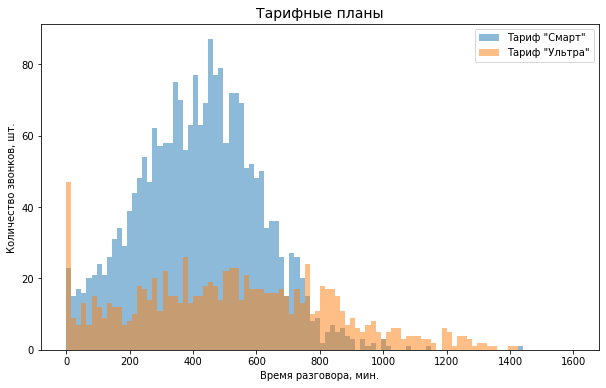

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(general_table.query('tariff_name == "smart"')['month_total_duration'], bins=100, alpha = 0.5, label='Тариф "Смарт"', range=(0, 1600))
plt.hist(general_table.query('tariff_name == "ultra"')['month_total_duration'], bins=100, alpha = 0.5, label='Тариф "Ультра"', range=(0, 1600))
plt.title('Тарифные планы', size=14)
plt.legend(loc='best')
plt.xlabel('Время разговора, мин.')
plt.ylabel('Количество звонков, шт.')
plt.show()

**Тариф "Смарт":**
 - большое количество клиентов любят поговорить по телефону, пиковый интервал приходится на значения от 200 до 650 минут;
 - присутствует небольшое количество пользователей, которые не ползуются телефонными рвзговорами;
 - присутствуют единычные случаи бесед продолжительностью более 800 минут.
 
 **Тариф "Ультра:**
 - весьма большое количество клиентов не использую услугу звонков;
 - телефонными разговорами пользется достаточно малое количество клиентов;
 - все клиенты пользующиеся звонками достаточно ровно распределились в интервале от 100 до 800 минут, далее начинается спад;
 - максимальные, не единичные значения продолжительности разговора находятся в значениях от 950 до 1050 минут.

### <a id="4.5">Гистограмма интернет траффика</a>

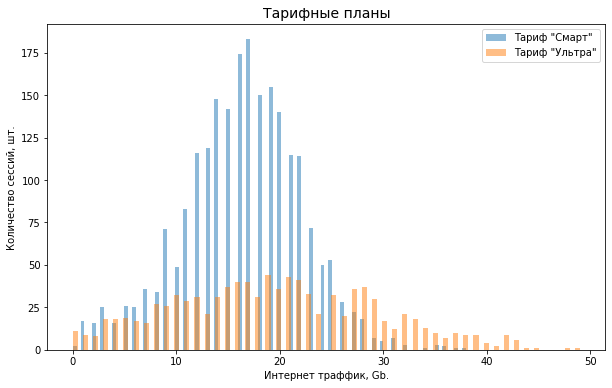

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(general_table.query('tariff_name == "smart"')['month_total_traffic_gb'], bins=100, alpha = 0.5, label='Тариф "Смарт"')
plt.hist(general_table.query('tariff_name == "ultra"')['month_total_traffic_gb'], bins=100, alpha = 0.5, label='Тариф "Ультра"')
plt.title('Тарифные планы', size=14)
plt.legend(loc='best')
plt.xlabel('Интернет траффик, Gb.')
plt.ylabel('Количество сессий, шт.')
plt.show()

Фактически мы наблюдаем картину аналогичную предыдущей гистограмме.
<br>Пользователи тарифа "Смарт" отличаются большой активностью, и свойством уверенно выходить за пределы лимита представленноо в тарифе(пик на отметке >15 Gb).
<br>Пользователи тарифа "Ультра" отличаются сдержанностью в использовании услуг, лишь небольшая их часть вышла за пределы 30 Gb лимита.

### <a id="4.6">Гистограмма сообщений</a>

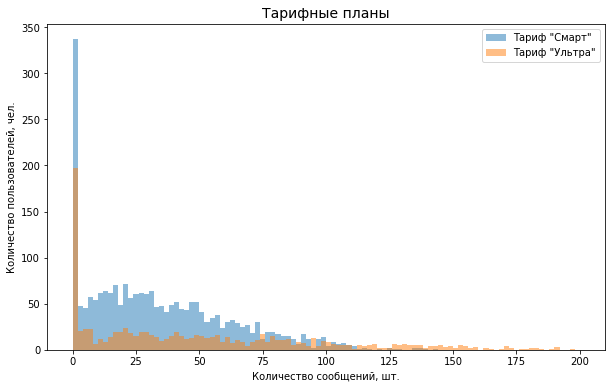

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(general_table.query('tariff_name == "smart"')['month_total_message'], bins=100, alpha = 0.5, label='Тариф "Смарт"', range=(0, 200))
plt.hist(general_table.query('tariff_name == "ultra"')['month_total_message'], bins=100, alpha = 0.5, label='Тариф "Ультра"', range=(0, 200))
plt.title('Тарифные планы', size=14)
plt.legend(loc='best')
plt.xlabel('Количество сообщений, шт.')
plt.ylabel('Количество пользователей, чел.')
plt.show()

История снова повторяется: "Смарты" - активны и забывают о границах, "Ультры" - сдержанны и не выходят за рамки.
<br>Мы видим огромное количество пльзователей, которые совсем не используют смс.

## <a id="verification">Проверка гипотез</a>

### <a id="5.1">Средняя выручка пользователей тарифов «Ультра» и «Смарт»</a>

H0 - средняя выручка пользователей тарифов «Смарт» и «Ультра» не различается
<br>H1 - средняя выручка пользователей тарифов «Смарт» и «Ультра» различается

Критический уровень статистической значимости примем равным 5%.

Дисперсия была расчитана раннее:
<br>для тарифа "Смарт" = 669785.71
<br>для тарифа "Ультра" = 141516.75

In [80]:
pval_profit = st.ttest_ind(general_table.query('tariff_name == "smart"')['total_month_profit']\
	, general_table.query('tariff_name == "ultra"')['total_month_profit'], equal_var=False)
print('P-value:', pval_profit.pvalue)

alpha = 0.05
if pval_profit.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


По итогам проверки данной гипотезы, мы можем сказать, что разница между прибылями получаемыми от тарифов есть, и она весьма значительна.

### <a id="5.2">Средняя выручка пользователей из Москвы и других регионов</a>

H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
<br>H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Критический уровень статистической значимости примем равным 5%.

In [82]:
# расчитаем дисперсию для городов

variance_moskow = np.var(general_table[general_table['city'] == 'Москва']['total_month_profit'], ddof=1)
display(variance_moskow)
variance_other_city = np.var(general_table[general_table['city'] != 'Москва']['total_month_profit'], ddof=1)
display(variance_other_city)

565636.467011886

654137.6285218114

In [83]:
pval_city = st.ttest_ind(general_table.query('city == "Москва"')['total_month_profit']\
	, general_table.query('city != "Москва"')['total_month_profit'], equal_var=False)
print('P-value:', pval_city.pvalue)

alpha = 0.05
if pval_city.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 0.5257376663729298
Не отвергаем нулевую гипотезу


Как это не удивительно, но прибыль от клиентов проживающих в Москве, не имеет весомого отличия от прибыли получаемой от клиентов проживающих в других регионах присутствующих в данной выборке.

## <a id="conclusion">Общий вывод</a>

**1. Рассмотрим поведение пользователей:**
 - пользователи тарифа "Смарт" отличаются большой активностью в разговорах и интернет-серфинге, постоянно выходя за границы условий предоставленных тарифом и переплачивая. Я думаю, что тут преобладает средний класс, который не готов платить более высокую цену за услуги, но в то же время не расчитывают уровень своей переплаты.
 - пользователи тарифа "Ультра" более сдержанны в использовании мобильного телефона, создается ощущение, что этим тарифом пользуются люди, для которых это просто рабочий инструмент. Они, в большинстве, не выходят за рамки условий и редко переплачивают.

**2. Доход от пользователей разных тарифов:**
<br>Как и ожидалось, доход от пользователей тарифа "Ультра" значительно выше, чем от "Смартов", похоже более высой абоненской платы вполне хватает что бы перекрыть доход от переплат с более дешевого тарифа.

**3. Доход от пользователей по регионам:**
<br>В с толице жизнь кипит и постоянно куда то мчится. Доход получаемый от жителей Москвы и доход от жителей других регионов очень близок друг к другу. Пользователи тарифов, и переплачивающих и нет, распределяются примерно поровну.

**4. Рекомендации оператору:**
 - я настоятельно рекомендую оператору перед передачей данных на анализ(даже внутри компании) шифровать информацию об абонентах, присутствие фамилии и имени в открытом виде, наводит на мысль, что оператор не заботится о сохранности данных своих клиентов, что вызывает вопросы и порождает недоверие;
 - тариф "Ультра", считаю возможным оставить без изменений, он перспективен и прослужит еще долго;
 - тариф "Смарт", на мой взгляд этот тарифный план себя изжил и готов с почестями уйти в архив. На его замену следует разработать тарифный план, в котором будет возможность самому клиенту настраивать лимиты траффика, минут и сообщений в соответствии с собственными потребностями. Абоненская плата такого тарифа не должна быть фиксированная, а должна изменяться пропорционально выбранным опциям. Такой шаг избавит клиента от вероятности остаться без связи и срочно вносить плату(что может вызвать недовольство оператором), и расширит возможности оператора по покрытию рынка мобильной связи.